Total number of iterations:  7


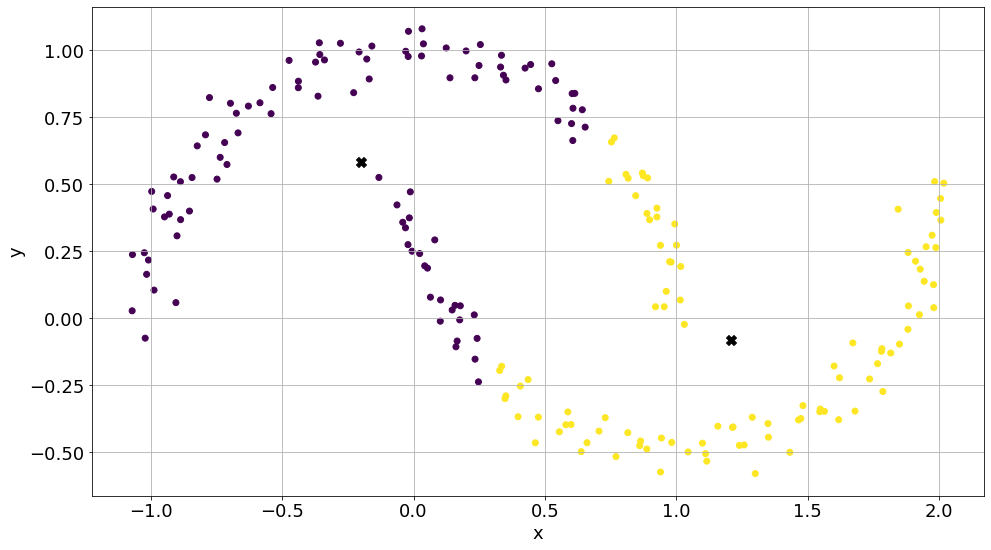

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.datasets.samples_generator as gen
import sklearn.datasets as ds

def ezKMeans(x, nClusters, seed) : 
    rngseed = np.random.RandomState(seed)
    index_ = rngseed.permutation(x.shape[0])[:nClusters]
    clusters = x[index_]
    flag = False
    nIterations = 0
    
    while flag == False: 
        nIterations += 1
        
        colors = metrics.pairwise_distances_argmin(x, clusters)
        newClusters = np.array([x[colors == i].mean(0) for i in range(nClusters)])
        
        if np.all(clusters == newClusters) : 
            flag = True
        clusters = newClusters
    
    print('Total number of iterations: ', nIterations)
    return clusters, colors

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

n = 10000
nClusters = 2
stDeviation = 3.0
rState = 10
seed = 2

#x, y = gen.make_blobs(n_samples = n, centers = nClusters, cluster_std = stDeviation, random_state = rState)
x, y = ds.make_moons(200, noise=.05, random_state=0)


#ax.plot(x[:, 0], x[:, 1], linestyle = 'None', marker = 'o')

clusters, colors = ezKMeans(x, nClusters, seed)
ax.scatter(x[:, 0], x[:, 1], c = colors)
for i in range(nClusters) : 
    ax.scatter(clusters[i][0], clusters[i][1], marker = 'X', color = 'k', s = 100)

xax = ax.xaxis
xlocs = xax.get_ticklocs()
xlabels = xax.get_ticklabels()
xlines = xax.get_ticklines()

xax.grid(True)

for label in xlabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
yax = ax.yaxis
ylocs = yax.get_ticklocs()
ylabels = yax.get_ticklabels()
ylines = yax.get_ticklines()
yax.grid(True)

for label in ylabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)

plt.show()